<a id='top'></a>

# CSCI 3022: Intro to Data Science - Fall 2020 Practicum 1
***

This practicum is due on Canvas by **11:59 PM on Monday October 12**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**: Nikolai Lyssogor

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. The practicum is designed to be completed using only the packages in the first given code cell.
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Bottom](#bot)

---

In [25]:
from scipy import stats
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

## [50 points] Problem 1: Elections

# The Election of 1800
### Can we get back to politics? 

source of inspiration: https://en.wikipedia.org/wiki/1800_United_States_presidential_election

These are interesting times in United States politics. John Adams is serving as the second President, and political parties have formed the very first series of "tickets" for President and Vice President nominees. Every state has a different method of selecting electors for the Electoral College. And the idea of winning voter's hearts and minds through campaigning is becoming a pervasive idea. **The two main political parties are the Federalist and the Democratic-Republicans.**

## The Candidates

### Federalist Ticket
* John Adams - Massachusetts
* Charles Cotesworth Pinckney - South Carolina

### Democratic-Republican Ticket
* Thomas Jefferson - Virgina
* Aaron Burr - New York

## The Voters
**As observed in the data set `voters1800.csv`**

* CitizenID - an integer unique number (identifies their row in the table).
* Age - an integer representing years since birth.
* State - a string indentifying the location.
* Interest1 - a string identifying the voter's most important campaign issue.
* Interest2 - a string identifying the voter's second most important campaign issue.
* Interest3 - a string identifying the voter's third most important campaign issue.


### Part 1) A sampling of the voting population

#### Import the dataset...

Import the 'voters1800.csv' as given.

#### A) Getting to know the dataset:
Give a statistical description of the dataset you imported. Be sure to include:
* The number of voters in each State
    * The Tukey 5 Number Summary of age for voters in each state
* A description of the distribution of interests
    * Consider how to represent the distribution of first, second, and third interests
    * Consider the breakdown by state

In [188]:
# import voters1800.csv into dataframe
electionDF = pd.read_csv("voters1800.csv")

# create dataframe for each state
VA_DF = electionDF.loc[(electionDF["State"] == 'Virginia')]
NY_DF = electionDF.loc[(electionDF["State"] == 'New York')]
SC_DF = electionDF.loc[(electionDF["State"] == 'South Carolina')]
MA_DF = electionDF.loc[(electionDF["State"] == 'Massachusets')]

# print number of voters in each state
print("number of voters in Virginia: %d" % len(VA_DF))
print("number of voters in New York: %d" % len(NY_DF))
print("number of voters in South Carolina: %d" % len(SC_DF))
print("number of voters in Massachusets: %d\n" % len(MA_DF))

# 5 number summaries for age
print("Virginia number summary for age:")
VA_DF["Age"].describe()

number of voters in Virginia: 231
number of voters in New York: 240
number of voters in South Carolina: 231
number of voters in Massachusets: 230

Virginia number summary for age:


count    231.000000
mean      48.709957
std       17.745736
min       18.000000
25%       33.500000
50%       49.000000
75%       64.500000
max       80.000000
Name: Age, dtype: float64

In [40]:
print("\nNew York number summary for age:")
NY_DF["Age"].describe()


New York number summary for age:


count    240.000000
mean      49.045833
std       17.771268
min       18.000000
25%       36.000000
50%       48.000000
75%       63.000000
max       79.000000
Name: Age, dtype: float64

In [41]:
print("\nSouth Carolina number summary for age:")
SC_DF["Age"].describe()


South Carolina number summary for age:


count    231.000000
mean      50.424242
std       18.924843
min       18.000000
25%       33.500000
50%       52.000000
75%       67.000000
max       80.000000
Name: Age, dtype: float64

In [42]:
print("\nMassachusets number summary for age:")
MA_DF["Age"].describe()


Massachusets number summary for age:


count    230.000000
mean      49.656522
std       18.929179
min       18.000000
25%       32.000000
50%       50.000000
75%       67.000000
max       79.000000
Name: Age, dtype: float64

In [198]:
print("\nCountry number summary for age:")
electionDF["Age"].describe()


Country number summary for age:


count    932.000000
mean      49.454936
std       18.327874
min       18.000000
25%       33.750000
50%       49.500000
75%       65.000000
max       80.000000
Name: Age, dtype: float64

75

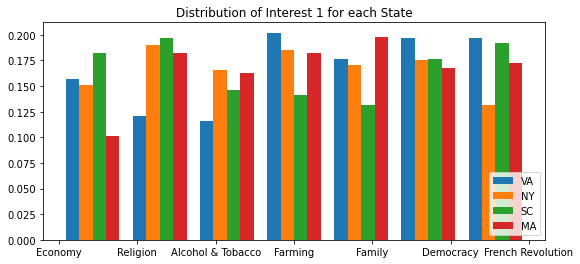

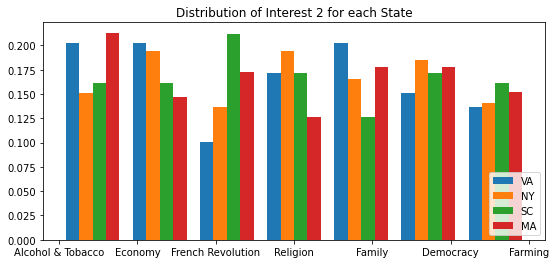

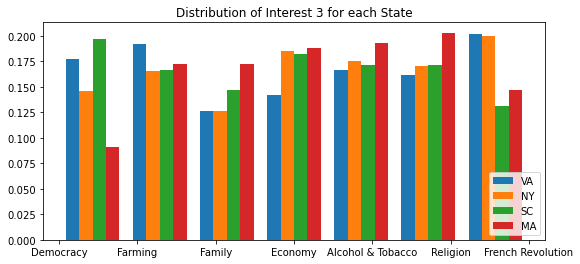

In [204]:
# distribution of Interest1 state-by-state
fig, ax1 = plt.subplots(figsize = (9, 4))
ax1.hist([VA_DF["Interest1"], NY_DF["Interest1"], SC_DF["Interest1"], MA_DF["Interest1"]], bins = 7, label = ['VA', 'NY', 'SC', 'MA'], density = True)
ax1.set_title('Distribution of Interest 1 for each State')
ax1.legend(loc='lower right')

# dist. of Interest2 state-by-state
fig, ax2 = plt.subplots(figsize = (9, 4))
ax2.hist([VA_DF["Interest2"], NY_DF["Interest2"], SC_DF["Interest2"], MA_DF["Interest2"]], bins = 7, label = ['VA', 'NY', 'SC', 'MA'], density = True)
ax2.set_title('Distribution of Interest 2 for each State')
ax2.legend(loc='lower right')

# dist. of Interest3 state-by-state
fig, ax3 = plt.subplots(figsize = (9, 4))
ax3.hist([VA_DF["Interest3"], NY_DF["Interest3"], SC_DF["Interest3"], MA_DF["Interest3"]], bins = 7, label = ['VA', 'NY', 'SC', 'MA'], density = True)
ax3.set_title('Distribution of Interest 3 for each State')
ax3.legend(loc='lower right')

np.sum(VA_DF["Age"] >= 60)

#### B) Model  baseline voting expecations 
Now that we have a pool of voters, let's model the baseline expectations for a vote.

For clarification, the Electoral College is a part of the process by which the United States votes for the president and vice-president. Each state has a certain number of "electoral votes" based on their populations (states with lower populations have less votes: today, states like Wyoming and Montana have 3 electoral college votes, while California has 55 electoral college votes because it is the state with the highest population) and these votes are cast based on the popular vote - how many voters voted for each politician. In some states, the electoral vote is decided by state-wide plurality - whoever gets the most votes in the entire state gets all of the electoral college votes (winner-take-all). In other states, each electoral college vote is associated with a electoral district and whoever has the most votes in each district takes that point. Though some details have changed, the electoral college operates in much the same way today as it did back in 1800!

Given the following assumptions:

* Each voter makes their decision independently of other voters


* With no other information, each voter is equally likely to vote for one party or the other
    * : i.e. P(Federalist) = P(Democratic-Republican)
   
   
* If a voter is from the same state as one of the presidential nominees, there is an additional **0.1** likelihood that they will vote for that nominee's party 
    * * i.e. if the Federalist president nominee is Ella Sarder from Wisconsin, voters from Wisconsin are 0.1 percent more likely to vote for the Federalists than the average voter. (At this point, they would be 50.1% to Federalist, 49.9% to D-R).
    
    
* If a voter is from the same states as one of the vice-presidental nominees, there is an additional **0.05** likelihood that they will vote for that nominee's party.


* Each state is responsible for a different number of Electoral College votes: 
    * Massachusetts has **16 votes**, and is split by electoral districts
        * Assume an even split among voters 
    * New York has **12 votes** and is Winner-Take-All
    * Virginia has **21 votes** and is split by electoral districts
        * Assume an even split among voters
    * South Carolina has **8 votes** and is Winner-Take-All
    
NOTE: South Carolina delegates were actually chosen by the state legislature, but that doesn't allow us to create such an interesting problem!

What is the expected outcome for an election in these four states? How many electoral college votes will each party ticket receive?

In [190]:
# simulate election in winner-take-all states
def vote_sim_WTA(state_df):
    parties = np.array(['fed', 'DR'])
    fed_count = 0
    DR_count = 0
    state_name = state_df["State"].iloc[0]
    
    # D-R probability on the left
    if(state_name == 'New York'): 
        votes = np.random.choice(parties, p = [.5005, .4995], size = len(state_df))
    elif(state_name == 'South Carolina'):
        votes = np.random.choice(parties, p = [.4995, .5005], size = len(state_df))
    
    for i in range(len(votes)):
        if(votes[i] == 'fed'):
            fed_count += 1
        elif(votes[i] == 'DR'):
            DR_count += 1
            
    return DR_count, fed_count
        

# simulate election in districted states
def vote_sim_district(state_df, num_districts):
    parties = np.array(['fed', 'DR'])
    state_name = state_df["State"].iloc[0]
    
    # determine probabilities
    if(state_name == 'Virginia'):
        p_DR = .501
        p_fed = .499
    elif(state_name == 'Massachusets'):
        p_DR = .499
        p_fed = .501
    
    # count individual votes and district votes separately
    dist_fed_count = 0
    dist_DR_count = 0
    elec_fed_count = 0
    elec_DR_count = 0
    
    for i in range(num_districts):
        # D-R probability on the left, each np.random is one district election
        votes = np.random.choice(parties, p = [p_DR, p_fed], size = int((len(state_df) / num_districts)))
        # count votes in a district
        for j in range(len(votes)):
            if(votes[j] == 'fed'):
                dist_fed_count += 1
            elif(votes[j] == 'DR'):
                dist_DR_count += 1
        # determine who gets the electoral point
        if(dist_fed_count > dist_DR_count):
            elec_fed_count += 1
        elif(dist_fed_count < dist_DR_count):
            elec_DR_count += 1
        # reset votes for next district
        dist_fed_count = 0
        dist_DR_count = 0
            
    return elec_DR_count, elec_fed_count


# tally up the total votes
elec_DR_total = 0
elec_fed_total = 0

# Virginia:
virginia_election = vote_sim_district(VA_DF, 21)
elec_DR_total += virginia_election[0]
elec_fed_total += virginia_election[1]

# Massachusets:
massachusets_election = vote_sim_district(MA_DF, 16)
elec_DR_total += massachusets_election[0]
elec_fed_total += massachusets_election[1]

# South Carolina:
SC_election = vote_sim_WTA(SC_DF)
if(SC_election[0] > SC_election[1]):
    elec_DR_total += 8
else: elec_fed_total += 8
    
# New York:
NY_election = vote_sim_WTA(NY_DF)
if(NY_election[0] > NY_election[1]):
    elec_DR_total += 12
else: elec_fed_total += 12
    
# print the outcome
if(elec_DR_total > elec_fed_total):
    print("The Democratic-Republican party wins the election in a %d to %d vote" % (elec_DR_total, elec_fed_total))
elif(elec_DR_total < elec_fed_total):
    print("The Federalist party wins the election in a %d to %d vote" % (elec_fed_total, elec_DR_total))

The Federalist party wins the election in a 40 to 13 vote


#### C) Electioneering
Of course, this election was really the first one with full-fledged political campaigns, attempting to sway voters with rhetoric and communication. You will play the role of the press secretary for a campaign, leading these efforts. Let's set up a series of rules for how you can influence the election:

* **You can only write one article per day.** Each article can only **cover one Interest**, and can only be **run in one State**. You have to tailor what you write to that population!


* Running a piece in a newspaper will appease voters in that state...
    * If the article is about a voter's **number 1 interest**, it adds **0.3** to the likelihood they will vote for your party.
    * If the article is about a voter's **number 2 interest**, it adds **0.2** to the likelihood they will vote for your party.
    * If the article is about a voter's **number 3 interest**, it adds **0.1** to the likelihood they will vote for your party.
    * If the article is about something a voter has **no interest** in, it only adds **0.02** to the likelihood they will vote for your party, because you are focusing on their state.
    
    
* Running a piece in a newspaper will also dissatisfy voters in other states...
    * The voters in other states will **lose 0.01** to the probability that they will vote for your party, because you are ignoring them.
    
    
* Some topics are big in certain areas!
    * No matter which newspaper you're writing in, news of articles about **Farming** will trickle down to the South (**Virginia and South Carolina**) and will **add 0.02** to the likelihood all voters there will vote for your party.   
    * No matter which newspaper you're writing in, news of articles about the **Economy** will trickle down to the North (**New York and Massachusetts**) and will **add 0.02** to the likelihood all voters there will vote for your party.
    
    
* Some topics are big with certain demographics!
    * No matter a voter's listed interests, writing about the **French Revolution** will **add .05** to the likelihood for **all voters Age 30** or under in any Region (North or South).
    
    * No matter a voter's listed interests, writing about **Alcohol & Tobacco** will **add 0.05** to the likelihood for **all voters Age 60 or above** in any Region (North or South).
    
#### Designing your Campaign Strategy
* You have 30 days to maximize your gains and try to win the election. What is your strategy if
    * you are the Democratic-Republican Ticket?
    * you are the Federalist Ticket?
* Do you manage to win, considering your opponent does nothing?
* Assume that if you somehow manage to add 50 or more likelihood to a single voter  (from 50%), then their P(vote) stops at 100%.

Jefferson has probability 0 of winning


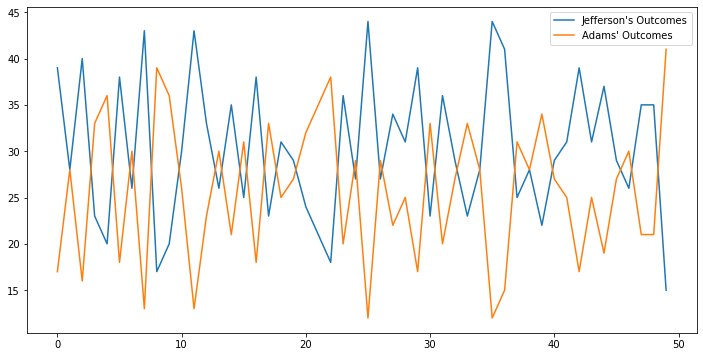

In [213]:
def election_sim():    
    # array holds probability for each voter, updated daily
    voter_probs = [.5 for i in range(932)]

    # import strategy spreadsheet
    strategyDF = pd.read_csv("press_strategy.csv")
    strategyDF

    # each day, do stuff
    for d in range(30):
        # update each voter's probability
        for v in range(len(voter_probs)):
            # if voter lives in the state in which the article was published
            if(strategyDF["Location"].loc[d] == electionDF["State"].loc[v]):
                # check if interests match article subject
                if(strategyDF["Subject"].loc[d] == electionDF["Interest1"].loc[v]):
                    voter_probs[v] += .003
                elif(strategyDF["Subject"].loc[d] == electionDF["Interest2"].loc[v]):
                    voter_probs[v] += .002
                elif(strategyDF["Subject"].loc[d] == electionDF["Interest3"].loc[v]):
                    voter_probs[v] += .001
                else: voter_probs[v] += .0002
            # voter not in state
            else: voter_probs[v] -= .0001
            # update for farming/economy or French Revolution/Alcohol & Tobacco
            if(strategyDF["Subject"].loc[d] == 'Farming' and (electionDF["State"].loc[v] == 'Virginia' or electionDF["State"].loc[v] == 'South Carolina')):
                voter_probs[v] += .0002
            if(strategyDF["Subject"].loc[d] == 'Economy' and (electionDF["State"].loc[v] == 'Massachusets' or electionDF["State"].loc[v] == 'New York')):
                voter_probs[v] += .0002
            if(strategyDF["Subject"].loc[d] == 'Alcohol & Tobacco' and electionDF["Age"].loc[v] >= 60):
                voter_probs[v] += .0005
            if(strategyDF["Subject"].loc[d] == 'French Revolution' and electionDF["Age"].loc[v] <= 30):
                voter_probs[v] += .0005

    candidates = ["Jefferson", "Adams"]
    VA_elec_votes = list([0, 0])
    VA_jeff_dist_votes = 0
    VA_adams_dist_votes = 0
    MA_elec_votes = [0, 0]
    MA_dist_votes = [0, 0]
    MA_count = 1
    NY_votes = [0, 0]
    SC_votes = [0, 0]


    # simulate the election
    for v in range(len(voter_probs)):
        # simulate each vote with that voter's unique probability
        vote = np.random.choice(candidates, p = [voter_probs[v], 1 - voter_probs[v]], size = 1)

        # winner-takes-all states
        if(electionDF["State"].loc[v] == 'New York'):
            if(vote == 'Jefferson'):
                NY_votes[0] += 1
            else: NY_votes[1] += 1
        elif(electionDF["State"].loc[v] == 'South Carolina'):
            if(vote == 'Jefferson'):
                SC_votes[0] += 1
            else: SC_votes[1] += 1        
        # vote-by-district states
        elif(electionDF["State"].loc[v] == 'Virginia'):
            if(vote == 'Jefferson'):
                VA_jeff_dist_votes += 1
            else: VA_adams_dist_votes += 1
            # check if we've tallied up an entire district
            if((VA_jeff_dist_votes + VA_adams_dist_votes) % 11 == 0 and VA_jeff_dist_votes + VA_adams_dist_votes != 0):
                # assign the electoral point
                if(VA_jeff_dist_votes > VA_adams_dist_votes):
                    VA_elec_votes[0] += 1
                else: VA_elec_votes[1] += 1
                # reset for new district
                VA_jeff_dist_votes = 0
                VA_adams_dist_votes = 0
        elif(electionDF["State"].loc[v] == 'Massachusets'):
            if(vote == 'Jefferson'):
                MA_dist_votes[0] += 1
            else: MA_dist_votes[1] += 1
            # check if we've tallied up an entire district
            if(((MA_dist_votes[0] + MA_dist_votes[1]) % 15 == 0 and MA_dist_votes[0] + MA_dist_votes[1] != 0) or MA_count == 230):
                # assign the electoral point
                if(MA_dist_votes[0] > MA_dist_votes[1]):
                    MA_elec_votes[0] += 1
                else: MA_elec_votes[1] += 1
                # reset for new district
                MA_dist_votes = [0, 0]

    jefferson_pts = 0
    adams_pts = 0

    # assign candidate their votes
    if(NY_votes[0] > NY_votes[1]): jefferson_pts += 12
    else: adams_pts += 12
    if(SC_votes[0] > SC_votes[1]): jefferson_pts += 8
    else: adams_pts += 8
    jefferson_pts += VA_elec_votes[0]
    adams_pts += VA_elec_votes[1]
    jefferson_pts += MA_elec_votes[0]
    adams_pts += MA_elec_votes[1]
    
    return jefferson_pts, adams_pts

# simulate election a bunch of times to test different strategies
jeff_outcomes = [0 for i in range(50)]
adams_outcomes = [0 for i in range(50)]
jeff_wins = 0
for i in range(0, 50):
    temp = election_sim()
    jeff_outcomes[i] = temp[0]
    adams_outcomes[i] = temp[1]
    
# graph each candidates' simulated points
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(jeff_outcomes)
ax.plot(adams_outcomes)
ax.legend(['Jefferson\'s Outcomes', 'Adams\' Outcomes'])

I approached this problem by first examining the ratio of electoral votes to number of voters in each state. I found that MA, with 16 electoral votes and 230 voters, gives each voter the power of deciding .0696 points. NY, SC, and VA give .05, .0346, and .0909 points for each of their voters' votes, respectively. The points decided per vote for the entire electorate is on average .0611. This makes VA votes 48.6% more powerful than the average, MA votes 13.7% more powerful than the average, NY votes 18.2% less powerful than the average, and SC votes 43.4% less powerful than the average. If we then look at the number of days we have to run articles in the papers, the amount of effort campaigning in each state should reflect that state's power relative to the entire electorate. This means that 11, 9, 6, and 4 days should be spent optimizing voter probability in VA, MA, NY, and SC, respectively. As for optimizing the probabilities of voters in each state, I started with a few ideas from eyeballing the interest distribution graphs above and then testing them with the simulation.

#### D) Electoral College Shifts

As elections wind down, you discover that some states have made changes to the ways their electoral colleges are selected! In particular...
* **Massachusetts** has delegated the power of selecting the Electoral College votes to the state legislature! Your campaign strategy is no longer relevant. They award **8 votes to the Democratic-Republican Ticket and 6 votes to the Federalist Ticket.**
* **Virginia is now a Winner-Take-All state.** Your campaign strategy better have worked, because 21 votes are now up for grabs!

Do these changes affect the outcomes from your original campaign strategy?

**Your Discussion of 1D Here:** Virginia becoming a winner-take-all state doesn't change the outcome of my strategy since I assumed that districts were comprised of voters in blocks of 11 in order of voter ID. I didn't think the purpose of the assignment was to come up with a gerrymandering scheme (I'll leave voter suppression to the real political strategists). Massachusets' votes being delegated to the state legislature obviously makes most of the campaigning I did in that state useless. That swings the probabilities away from my favor since I lose the opportunity to increase my candidate's chances among voters in the other states. 

<br>

---
[Back to top](#top)
<a id='p2'></a>

## [50 points] Problem 2: An Intro to Computational Epidemiology

### The Model

In this problem we introduce and begin to explore some of the baseline tools of computational epidemiology: the SIR and SI models.  

Note: There are a number of images in this problem.  If you can't get them to display properly, they are hosted at https://drive.google.com/drive/folders/1cZ2JZ2TiHja5qCpLTD2WVEh8tEM8pfU_?usp=sharing

These models exist on graphs, where vertices or nodes represent people, agents, or surfaces that might carry a communicable disease.  Edges connecting nodes represent nodes that are in close contact with one another, and at risk of exchanging the disease.  


We will implement a variant of the SIR model.  In this model, each vertex has one of three possible states:
 - **I** for Infected, and at risk of passing the disease to neighboring susceptible vertices.
 - **S** for Susceptible, and at risk of becoming infected by its neighbors
 - **R** for removed, and no longer at risk of contracting or spreading the infection.

The model evolves *iteratively*, where for each discrete time step (one unit of `time`) the following two calculations occur:

** Step 1:** First, consider all **edges** that connect an infected person to a susceptible person.  The susceptible vertex becomes infected with independent and identical probability $\beta$ *for each* edge that that connects them to an infected vertex.  This is depicted below in the SIR_Edges.png image.

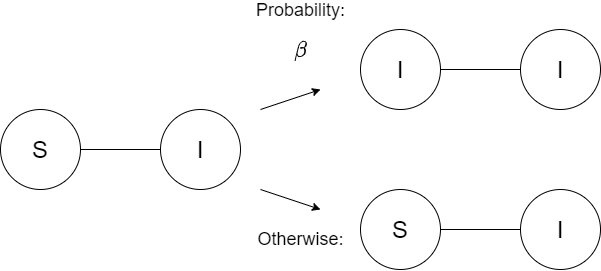

A susceptible edge can only be infected once, and is only at risk of being infected by nodes that were infected (**I**) at the *start* of each iteration: newly infected nodes don't pass the infection onwards until the next time step.

** Step 2: ** Next, consider all infected (**I**) **vertices** that were infected at the *start* of the time step - prior to step 1 - and consider them recovered **R** with probability $\gamma$.  This is depicted below in the SIR_Removal.png image.

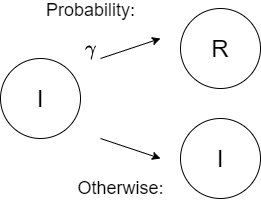

Think of this process as the probability of becoming well: not only are those ndoes no longer contagious, they also have developed antibodies that make them immune to re-infection!

The model can run for any number of time steps, but for reasonably small graphs we might expect to see the number of infections taper off to zero after a while.  If you watched any news coverage during the onset of COVID-19, one of the main tasks in predicting a pandemic is predicting the *basic reproduction number* $R_0= \frac{\beta}{\gamma}$ of the disease.  Since $\beta$ represents a rate of spread and $\gamma$ represents a rate of recovery, the ratio is important in determining whether a disease spreads faster than recovery can occur.

### Warmups

A couple of quick questions to make sure we're understanding the model and the roles of $\beta$ and $\gamma$.

Feel free to use office hours/piazza to ask more pointed questions about the Warmups **only** to make sure you understand the basics of the transition model before you approach the implementation section later.

**Part A**

Suppose we have the small system depicted at time $t=0$ below, in SIR_Warmup1.png.

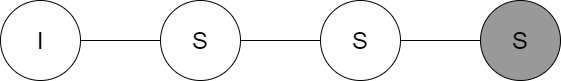

What is the exact probability that the last node on the right is an infected node **I** after exactly 3 time steps?  What is the exact probability that the leftmost node is still infected at this time?

**Solution to Part A**: The probability that the fourth becomes infected after 3 time steps is equal to the probability that the second node becomes infected at $t = 1$ and the third node becomes infected at $t = 2$ and the fourth node becomes infected at $t = 3$. This is equal to $\beta^3$. The probability that the first node does not recover over 3 time steps is $(1 - \gamma)^3$.

**Part B**

Suppose we consider the alternative 4-vertex graph depicted below, in SIR_Warmup2.png.

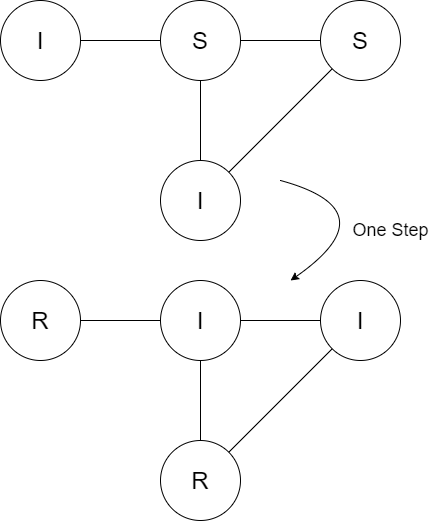

What is the exact probability that we transition from the graph on the top to the exact graph on the bottom in a single time step?  Note that the "center" **S** node with two infected neighbors should be more likely to end up infected than rightmost node.

**Solution to Part B**: To solve this, we will multiply the probability each discrete transition takes place. That is, both **I** nodes recover and both **S** nodes become infected. The probability of both **I** nodes recovering is $\gamma^2$. The probability of the center **S** node becoming infected is $2\beta$, since it can become infected by either **I** node, and the probability of the other **S** node becoming infected is just $\beta$. Multiplying these all together, the probability of this exact scenario transpiring is $2\beta^2\gamma^2 $.

### Coding The Model

Enough with the exact pen-and-paper solutions!  Let's run this model.  Suppose we wish to implement the SIR model on the graph below (SIR_graph.png):

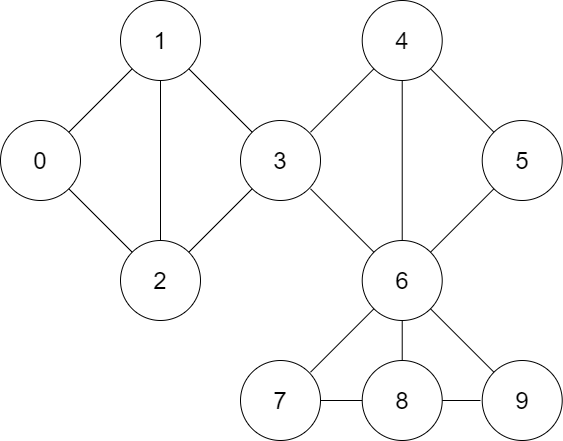

For your convenience, one way to represent this graph as a dictionary of neighbors is listed below.

`nodes` holds the 10 vertices, labelled by their indexes 0 through 9.
`neighbors` is a dictionary, where e.g. `neighbors[1]` holds the list of neighboring vertices to vertex #1.

In [19]:
nodes = list(range(10))
N = len(nodes)
neighbors = {0 : [1,2], 1 : [0,2,3], 2 : [0,1,3], 3 : [1,2,4,6], 4 : [3,5,6], 
             5 : [4,6], 6 : [3,4,5,7,8,9], 7 : [6,8], 8 : [6,7,9], 9 : [6,8]}

#Dictionary usage:
for node in neighbors:
    print('Node # ',node, ' has neighbors of ', neighbors[node])

Node #  0  has neighbors of  [1, 2]
Node #  1  has neighbors of  [0, 2, 3]
Node #  2  has neighbors of  [0, 1, 3]
Node #  3  has neighbors of  [1, 2, 4, 6]
Node #  4  has neighbors of  [3, 5, 6]
Node #  5  has neighbors of  [4, 6]
Node #  6  has neighbors of  [3, 4, 5, 7, 8, 9]
Node #  7  has neighbors of  [6, 8]
Node #  8  has neighbors of  [6, 7, 9]
Node #  9  has neighbors of  [6, 8]
1


**Part C:**

Implement a function **SIR_step(states, gamma, beta)** that takes one step of the SIR model with a known $\beta$ and $\gamma$ on the graph given above.

* **initial_state** should be a list of length 10 of the state of each vertex, e.g. [S,S,S,I,I,S,S,S,S,I].
* **gamma** is the constant determining recovery rate.
* **beta** is the constant determining transmission rate.

The return of the function should be the new states for each vertex, in the same format as **initial_state**.

To actually implement this model, you may want to create a list of `edges` rather than just neighbors, because one way to implement one step 1 of the model is to loop over all edges.  Note that each edge should appear exactly once in this loop.


In [36]:
def SIR_step(initial_state, gamma, beta):
    # stores updated values
    new_state = ['X' for i in range(10)]
    # choices for np.random
    infected_choice = ['R', 'I']
    susceptible_choice = ['I', 'S']
    neighbors = { 0 : [1,2], 1 : [0,2,3], 2 : [0,1,3], 3 : [1,2,4,6], 4 : [3,5,6],
                 5 : [4,6], 6 : [3,4,5,7,8,9], 7 : [6,8], 8 : [6,7,9], 9 : [6,8] }
    
    # iterate over each node
    for i in neighbors:
        # case 1: node is infected
        if(initial_state[i] == 'I'):
            # reassign state with probability of recovery
            temp = np.random.choice(infected_choice, size = 1, p = [gamma, 1 - gamma])
            new_state[i] = temp[0]
            
        # case 2: node is susceptible
        elif(initial_state[i] == 'S'):
            # cumulative probability the node becomes infected
            beta_sum = 0
            for j in range(len(neighbors[i])):
                s = neighbors[i][j]
                if(initial_state[s] == 'I'):
                    beta_sum += beta
            temp = np.random.choice(susceptible_choice, size = 1, p = [beta_sum, 1 - beta_sum])
            new_state[i] = temp[0]
        # case 3: node is recovered
        else: new_state[i] = 'R'
    
    return(new_state)

Run a couple of quick sanity checks and self-checks below:
 - what should happen if `states` contains no **I** nodes?
 - what should happen if `states` contains **I** nodes but $\beta=0$?


In [38]:
# test case 1: no I nodes
none_infected = ['S', 'S', 'S', 'S', 'R', 'R', 'S', 'R', 'R', 'S']
print("output for no infected nodes: ")
SIR_step(none_infected, .5, .5)

# test case 2: 'I' nodes exist, beta = 0
states_test = ['S', 'I', 'S', 'S', 'I', 'I', 'S', 'I', 'I', 'S']
print("output for beta = 0: ")
SIR_step(states_test, .5, 0)

output for no infected nodes: 
output for beta = 0: 


['S', 'R', 'S', 'S', 'I', 'R', 'S', 'R', 'R', 'S']

Time to run the model for an initial set of states and describe what happens!  Suppose the initial states of each of the nodes is given by:

`states=[S, S, S, I, I, S, I, S, S, S]`

so nodes labelled 3, 4,  and 6 are infected.  


**Part D:**
Now we want to create a function or a loop that runs **SIR_step** for 500 time steps.  At each step, you should save the current state of each node (you may want to create a data frame to hold them, like `df_per_run`).  When we take 500 steps, this represents *one* example of what could happen when an infection is set loose in a small (compartmental) environment.  As data scientists, we need to run this 500-step experiment multiple times to understand the overall descriptors of our simulated pandemic!

Repeat this experiment 100 times (so you'll have 100 instances of 500 time steps) under 3 different sets of values of the constants $\gamma$ and $\beta$.  You'll want another data frame to save some aggregate descriptors of each run, like `df_overall`.  The three sets of conditions we should run experiments under are:

* First, when the values of $\gamma$ and $\beta$ are each 0.1.
* Second, when $\beta=0.2$ and $\gamma=0.05$.
* Finally, when $\beta=0.05$ and $\gamma=0.2$.

For each, you'll want to save the time step (if any) at which the infection ends and the time spend infected for each node.

In [160]:
def SIR_run(gamma, beta):
    # recommended per_run setup.  Put this in a loop/function:
    df_per_run = pd.DataFrame(data = None, columns = np.array(range(10)))
    df_per_run.loc[0,:] = ['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']

    curr_states = ['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']
    steps_infected = np.array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0])
    end_step = 501
    is_pandemic_over = True
    flag = True

    for run in range(1, 500):
        # add another step to the run
        curr_states = SIR_step(curr_states, gamma, beta)
        df_per_run.loc[run,:] = curr_states
        
        # tally infected nodes and see if the infection is erradicated
        for n in range(len(curr_states)):
            if(curr_states[n] == 'I'):
                steps_infected[n] += 1
                is_pandemic_over = False
                
        if(flag == True):
            if(is_pandemic_over == True):
                end_step = run
                flag = False # prevent updating end_step again
                
        is_pandemic_over = True
        
    return df_per_run, steps_infected, end_step

#test = SIR_run(.01, .01)
#test[1]
    
 
def SIR_experiment(gamma, beta):
    df_time_infected = pd.DataFrame(data = None, columns = np.array(range(10)))
    end_steps = [501 for i in range(100)]
    
    # do 100 runs
    for i in range(0, 100):
        curr_run = SIR_run(gamma, beta)
        df_time_infected.loc[i,:] = curr_run[1]
        end_steps[i] = curr_run[2]
    
    
    return df_time_infected, end_steps

**Part E:**

For each one of those 3 sets of experiments, report what proportion of the time was node 0 *never* infected?


In [161]:
# 3 cases: laptop get hot OUCH
experiment1 = SIR_experiment(.01, .01)
experiment2 = SIR_experiment(.02, .005)
experiment3 = SIR_experiment(.005, .02)

# calculate proportion of the time 0 was never infected
num_zero1 = 0
num_zero2 = 0
num_zero3 = 0

for i in range(0, 100):
    if(experiment1[0].iloc[i][0] == 0):
        num_zero1 += 1
    if(experiment2[0].iloc[i][0] == 0):
        num_zero2 += 1
    if(experiment3[0].iloc[i][0] == 0):
        num_zero3 += 1

#recommended output style:
print('For beta=', .01,' and gamma=', .01,' observed node zero never infected', num_zero1 / 100  ,'proportion of the time')
print('For beta=', .02,' and gamma=', .005,' observed node zero never infected', num_zero2 / 100  ,'proportion of the time')
print('For beta=', .005,' and gamma=', .02,' observed node zero never infected', num_zero3 / 100  ,'proportion of the time')

For beta= 0.01  and gamma= 0.01  observed node zero never infected 0.53 proportion of the time
For beta= 0.02  and gamma= 0.005  observed node zero never infected 0.82 proportion of the time
For beta= 0.005  and gamma= 0.02  observed node zero never infected 0.09 proportion of the time


**Part F:**

Was there a time step after which no nodes were infected?  If so, when did this happen?  Make a three vertically-aligned histograms of when the infection disappeared, including instances where it was still present at time 500 as `time=501`.

Text(0.5, 1.0, 'Steps Until end for gamma = .005, beta = .02')

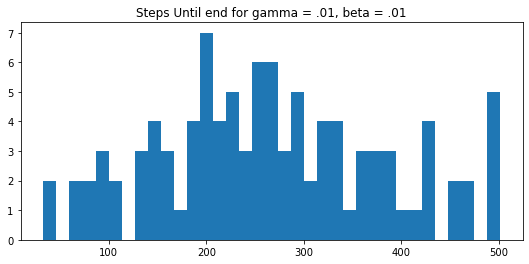

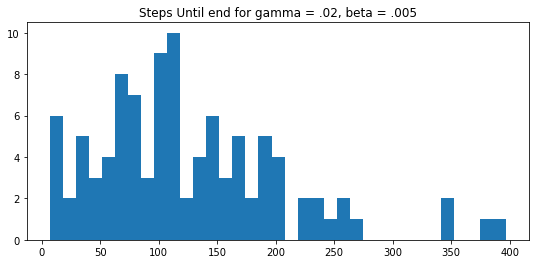

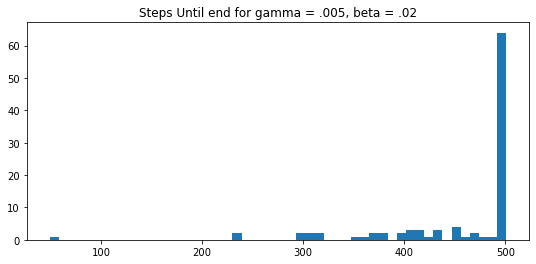

In [186]:
# experiment 1
fig, ax1 = plt.subplots(figsize = (9, 4))
ax1.hist(experiment1[1], bins = 35)
ax1.set_title('Steps Until end for gamma = .01, beta = .01')

# experiment 2
fig, ax1 = plt.subplots(figsize = (9, 4))
ax1.hist(experiment2[1], bins = 35)
ax1.set_title('Steps Until end for gamma = .02, beta = .005')

# experiment 3
fig, ax1 = plt.subplots(figsize = (9, 4))
ax1.hist(experiment3[1], bins = 50)
ax1.set_title('Steps Until end for gamma = .005, beta = .02')

**Part G:**

Create a line graph with three lines showing the average number of time steps spent infected for each node.  The lines will have an x-axis of the index of each node and a y-axis of the average number of time steps spent infected.  There should be one line per pair of $\beta, \gamma$ values.

Sanity check: for the 3 nodes that start as infected, explain approximately what should this number be in terms of the distributions discussed in the class.

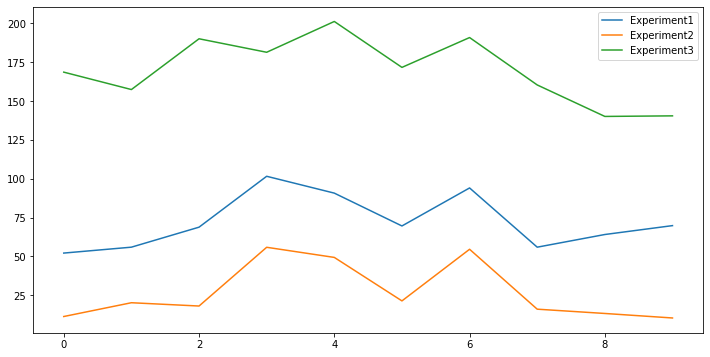

In [176]:
# calculate average time each node was infected
avg_inf_time1 = np.array([0 for i in range(0, 10)])
avg_inf_time2 = np.array([0 for i in range(0, 10)])
avg_inf_time3 = np.array([0 for i in range(0, 10)])

for i in range(0, 100):
    for j in range(0, 10):
        avg_inf_time1[j] += experiment1[0].iloc[i][j]
        avg_inf_time2[j] += experiment2[0].iloc[i][j]
        avg_inf_time3[j] += experiment3[0].iloc[i][j]
    
avg_inf_time1 = avg_inf_time1 / 100
avg_inf_time2 = avg_inf_time2 / 100
avg_inf_time3 = avg_inf_time3 / 100

fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(avg_inf_time1)
ax.plot(avg_inf_time2)
ax.plot(avg_inf_time3)
ax.legend(['Experiment1','Experiment2','Experiment3'])

**Sanity check:** Since those three nodes start out infected and have more edges than any of the other nodes, we should expect to see their average number of steps infected be the highest. Locally, the area immediately around each of the three initially infected nodes shows a normal distribution, with the average number of steps infected decreasing as the number of steps away from the infected node increases. 

**Part H:**

Comment on anything you found interesting or unusual.

For lower beta values (experiments 1 & 3), the line plot representing the average number of steps each node spent in an infected state retained a similar shape where we see peaks around nodes 3, 4, & 6, the nodes that were initially infected. There is a noticable drop in average time spend infected for all other nodes. Even node 5, which is initially connected to two infected nodes, and therefore whose probability of infection is doubled initially, still spent noticeably less time infected than the ones that started out infected. However, in experiment 2, where the beta value is higher and the gamma value lower, the variance in time spent infected for each node is lower. This makes intuitive sense, as once a node becomes infected (which will happen faster on average), it is likely to stay in that state for longer, therefor bringing up the 'tails' of the distribution.

Computational epidemiology is a huge field, and models can add all kinds of added components: nodes could be surfaces *or* people, graphs could be representing cities or communities instead of individuals, etc.  One similar model is used instead for diseases that don't ever have **R** states: nodes just transition from **I** to **S** because there may be no long-term immunity after infection.

If you're ever interested in learning more about computational epidemiology, CU-Boulder has a couple of world experts in network-based epidemology and computational public health.  Check our course offerings by Aaron Clauset and Dan Larremore for great opportunities to do these sorts of things in a more advanced setting.

<br>

---
[Back to top](#top)
<a id='bot'></a>